In [14]:
from keras.models import Sequential
from keras.layers import Dense, Recurrent, LSTM
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

import os
from sklearn.model_selection import train_test_split


MODEL_DIR = './project/models/'

In [15]:
def print_samples(x, y, n=10):
    higher = len(x)
    print(higher)
    for i in range(n):
        j = np.random.randint(0, higher)
        print(x[j], y[j])

In [27]:
def build_model(x, y, hidden_layers=2, neurons=32, epochs=10, plot=True):
    # converting to numpy array
    x = np.array(x)
    y = np.array(y)
    
    # splitting dataset in training and testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


    model = Sequential()
    # model.add(Dense(64, input_shape = (1, 10)))
    for i in range(hidden_layers - 1):
        model.add(LSTM(neurons, return_sequences = True, input_shape=(1,10)))
    model.add(LSTM(neurons))
    
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
    metrics=['accuracy'])

    # default batch size = 32
    history = model.fit(x_train.reshape(len(x_train),1,10), y_train, validation_split=0.15, epochs=epochs) 
    if plot:
        print(history.history.keys())
        plt.figure(figsize=(15, 5))
        #  "Accuracy"
        plt.subplot(121)
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        # "Loss"
        plt.subplot(122)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
    print('Evaluating model')
    metrics = model.evaluate(x_test.reshape(len(x_test), 1,10), y_test)
    print('\n')
    for i in range(len(model.metrics_names)):
        print(str(model.metrics_names[i]) + ": " + str(metrics[i]))


r2_172_168_4_2
Train on 12113 samples, validate on 2138 samples
Epoch 1/16
12113/12113 [==============================] - 2s - loss: 0.4079 - acc: 0.9080 - val_loss: 0.1678 - val_acc: 0.9170
Epoch 2/16
12113/12113 [==============================] - 1s - loss: 0.1426 - acc: 0.9226 - val_loss: 0.1350 - val_acc: 0.9230
Epoch 3/16
12113/12113 [==============================] - 1s - loss: 0.1292 - acc: 0.9335 - val_loss: 0.1265 - val_acc: 0.9375
Epoch 4/16
12113/12113 [==============================] - 1s - loss: 0.1239 - acc: 0.9365 - val_loss: 0.1244 - val_acc: 0.9323
Epoch 5/16
12113/12113 [==============================] - 1s - loss: 0.1196 - acc: 0.9372 - val_loss: 0.1216 - val_acc: 0.9355
Epoch 6/16
12113/12113 [==============================] - 1s - loss: 0.1164 - acc: 0.9403 - val_loss: 0.1167 - val_acc: 0.9406
Epoch 7/16
12113/12113 [==============================] - 1s - loss: 0.1136 - acc: 0.9409 - val_loss: 0.1151 - val_acc: 0.9397
Epoch 8/16
12113/12113 [=======================

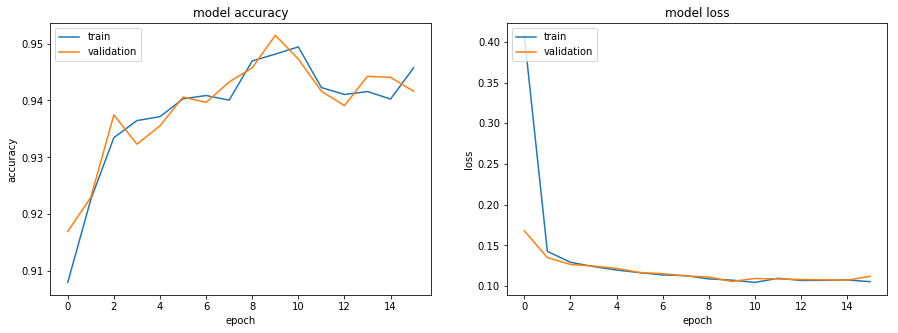

Evaluating model
2816/3563 [======================>.......] - ETA: 0s

loss: 0.110754986078
acc: 0.942885231928


In [28]:
for target in os.listdir(MODEL_DIR):
    path = os.path.join(MODEL_DIR, target)
    print(target)
    for router in os.listdir(path):
        model = os.path.join(path, router)
        x = []
        y = []
        for dataset in os.listdir(model):
            file = os.path.join(model, dataset)
            with open(file, 'r') as f:
                lines = f.readlines()
            for line in lines:    
                cnt, label = line.split(',')
                cnt = np.array([int(c) for c in cnt.split()[1:]], dtype=np.int)
                label = np.array([int(l) for l in label.split()], dtype=np.int)
                x.append(cnt)
                y.append(label)
        
        build_model(x, y, neurons=12, epochs=16)

        break
    break